There are theoretical/simulated bit error curves for Rayleigh channel

In [3]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from scipy import special as sp

In [4]:
# Num of info bits
k = 1000;

# Generate some info
info_bits = np.random.randint(0,2,k)

# BPSK modulation
modulated_bits = -2*info_bits+1

# Channel conditions
SNR = np.linspace(1,40,num=20)
sigma = np.sqrt(1/SNR)

bit_err = np.zeros(np.size(sigma))
ITER_MAX = 1000
for i in range(np.size(sigma)):
    for iter in range(ITER_MAX):
        # Channel
        noise_vec = sigma[i] * numpy.random.randn(k);
        # 1/sqrt(2) is chosen to fit the theoretical formula
        fading_coeff = np.random.rayleigh(1/np.sqrt(2), k); 
        received_sig = fading_coeff*modulated_bits + noise_vec
        
        # Receiver
        received_sig[received_sig >= 0] = 0
        received_sig[received_sig < 0] = 1

        bit_err[i] += np.sum((received_sig + info_bits) % 2) / k
    bit_err[i] /= ITER_MAX
    

In [5]:
# Theory
theory_ber = 0.5 * (1 - np.sqrt(SNR/(2 + SNR)));
theory_ber2 = 0.5 * (1 - np.sqrt(SNR/(SNR+1)));
approx_theory_ber = 1/(2*SNR);

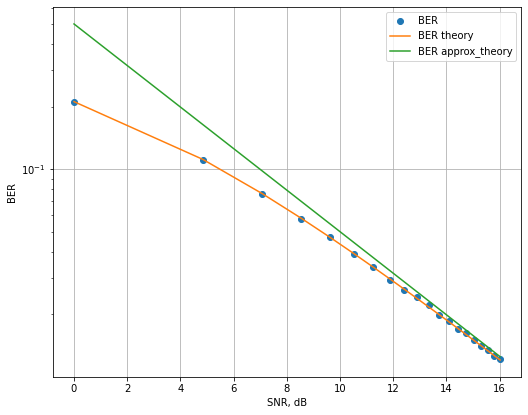

In [6]:
# Plot the results
SNR_dB = 10*np.log10(SNR)
plt.figure(figsize=(8.4, 6.8))
plt.semilogy(SNR_dB, bit_err, 'o', label = 'BER' )
plt.semilogy(SNR_dB, theory_ber, label = 'BER theory')
plt.semilogy(SNR_dB, approx_theory_ber, label = 'BER approx_theory')
plt.grid()

plt.xlabel('SNR, dB')
plt.ylabel('BER')
plt.legend()
plt.show()